#Import Library

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score


#Loading MNIST Datasets

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=100, shuffle=True)

test_data = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=100, shuffle=False)


100%|██████████| 9912422/9912422 [00:00<00:00, 91464442.76it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 31686030.30it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 500: Internal Server Error



100%|██████████| 1648877/1648877 [00:01<00:00, 1415477.20it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 1222912.36it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



#Visualizing MNIST Dataset

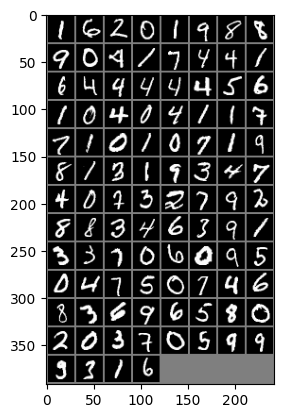

In [ ]:
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))


#Neural Network Design

In [ ]:
#mendifinisikan sebuah class
# def __init__(self) Metode ini akan dijalankan saat objek dari kelas Model dibuat.
#Di dalam konstruktor ini, kita mendefinisikan arsitektur model
#menggunakan 3 layer sebagai encoder dalam model
#self_encoder1 dengan 784 input
#self_encoder2 dengan 128 input,64 output
#self_encoder3 dengan 64 input, 10 output
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.encoder1 = nn.Linear(28 * 28, 128)
        self.encoder2 = nn.Linear(128, 64)
        self.encoder3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input menjadi 1D
        x = torch.relu(self.encoder1(x))
        x = torch.relu(self.encoder2(x))
        x = self.encoder3(x)
        return x

model = Model()


#Set Hyperparameters

In [ ]:
#inisialisasi fungsi Loss dengan menggunakan nn.CrossEntropyLoss() apa bila lebih >2 kelas

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


#Training Loop MNIST Datasets

In [ ]:
#membuat perulangan(looping) untuk menjalankan pelatihan selama 10 epoch


for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}')


Epoch 1, Loss: 0.364368038897713
Epoch 2, Loss: 0.33131152850886186
Epoch 3, Loss: 0.3092752587795258
Epoch 4, Loss: 0.29219093228379883
Epoch 5, Loss: 0.27756489381194116
Epoch 6, Loss: 0.2647900050505996
Epoch 7, Loss: 0.2514586690813303
Epoch 8, Loss: 0.23945156764239073
Epoch 9, Loss: 0.22720718647663793
Epoch 10, Loss: 0.21570577373107275


#Evaluate Model Neural Network

In [ ]:
model.eval()
correct = 0
total = 0
predicted_labels = []
true_labels = []

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        predicted_labels.extend(predicted.numpy())
        true_labels.extend(labels.numpy())

accuracy = accuracy_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels, average='weighted')
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
confusion = confusion_matrix(true_labels, predicted_labels)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print('Confusion Matrix:')
print(confusion)


Accuracy: 93.66%
F1 Score: 0.94
Precision: 0.94
Recall: 0.94
Confusion Matrix:
[[ 961    0    0    0    0    7    7    2    3    0]
 [   0 1106    3    2    1    3    4    2   14    0]
 [  10    7  935    8   10    2   14   11   33    2]
 [   3    1   15  909    0   47    2   11   19    3]
 [   1    1    3    1  917    1   11    2    8   37]
 [   8    2    0   12    3  828   12    2   19    6]
 [   9    3    4    0    7   13  917    1    4    0]
 [   3    7   22    5    4    1    0  960    3   23]
 [   7    3    3   13    7   21    8    8  899    5]
 [  11    7    1    7   18    9    1   10   11  934]]


Berdasarkan hasil akurasi yang ditampilkan,mendapatkan nilai akurasi yang tinggi di angka 93.66%.Maka dari itu model yang dibangun sudah memiliki akurasi yang baik